#### Netflix Show and Movies 
The dataset contains metadata about movies and TV shows, including the title, director, and cast. It also provides details such as the release year, rating, and duration, among others. As the first step, we will load the dataset and create some new features. In this analysis, I have examined the dataset to uncover top insights and findings.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv("netflix_titles.csv")
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Data preprocessing 

In [3]:
# Convert to datetime type
data['date_added'] = pd.to_datetime(data['date_added'])
data['year'] = data.date_added.dt.year 
data['month'] = data.date_added.dt.month 

In [4]:
# duration needs to cleansing 
data['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [5]:
data['season_count'] = data.apply(lambda x: str(x['duration']).split(" ")[0] if "Season" in str(x['duration']) else "", axis=1)
data['duration'] = data.apply(lambda x: str(x['duration']).split(" ")[0] if "Season" not in str(x['duration']) else "", axis=1)

In [6]:
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1


#### Visualization 

##### Content Type on Netflix
as expected
+ Movies account for 70% of all content on Netflix.
+ TV shows make up 30% of the content.

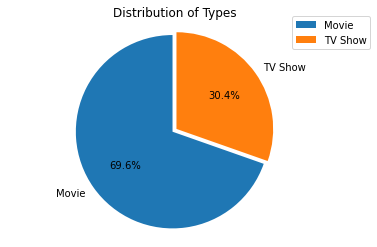

In [7]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'type' is the column of interest.
col = "type"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns={col: "count", "index": col})

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(grouped['count'], labels=grouped[col], autopct='%1.1f%%', startangle=90, explode=[0.05, 0])

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set the title and the legend
plt.title('Distribution of Types')
plt.legend(grouped[col], loc="upper right", bbox_to_anchor=(1.1, 1.05))

# Show the plot
plt.show()


##### Growth in contetn ove the years 
+ Since 2014, the number of movies has grown rapidly.
+ Netflix has not only added new content but also a variety of older content.

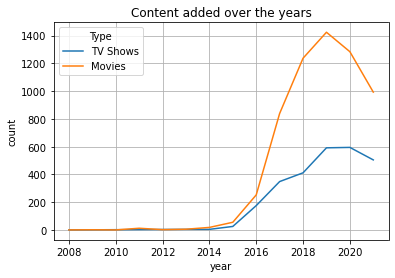

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'type' and 'year_added' are columns in your DataFrame.
# Filter the DataFrame for TV Shows and Movies
d1 = data[data["type"] == "TV Show"]
d2 = data[data["type"] == "Movie"]

# Get the value counts and percentages for each year for TV Shows
vc1 = d1['year'].value_counts().reset_index()
vc1 = vc1.rename(columns={'year': 'count', 'index': 'year'})
vc1['percent'] = 100 * vc1['count'] / vc1['count'].sum()
vc1 = vc1.sort_values('year')

# Get the value counts and percentages for each year for Movies
vc2 = d2['year'].value_counts().reset_index()
vc2 = vc2.rename(columns={'year': 'count', 'index': 'year'})
vc2['percent'] = 100 * vc2['count'] / vc2['count'].sum()
vc2 = vc2.sort_values('year')

# Create a line plot for TV Shows
sns.lineplot(data=vc1, x='year', y='count', label='TV Shows')

# Create a line plot for Movies
sns.lineplot(data=vc2, x='year', y='count', label='Movies')

# Add titles and labels
plt.title('Content added over the years')
plt.legend(title='Type')

plt.grid()
# Show the plot
plt.show()



In [9]:
small = data.sort_values("release_year", ascending = True)
small = small[small['season_count'] != ""]
small[['title', "release_year","year"]][:15]

,title,release_year,year
4250,Pioneers: First Women Filmmakers*,1925,2018.0
1331,Five Came Back: The Reference Films,1945,2021.0
7743,Pioneers of African-American Cinema,1946,2017.0
8541,The Twilight Zone (Original Series),1963,2017.0
8189,The Andy Griffith Show,1967,2017.0
4550,Monty Python's Fliegender Zirkus,1972,2018.0
4551,Monty Python's Flying Circus,1974,2018.0
6549,Dad's Army,1977,2018.0
6674,El Chavo,1979,2017.0
7588,Ninja Hattori,1981,2018.0


In [10]:
small = data.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year","year"]][:15]

,title,release_year,year
7790,Prelude to War,1942,2017.0
8205,The Battle of Midway,1942,2017.0
8660,Undercover: How to Operate Behind Enemy Lines,1943,2017.0
8739,Why We Fight: The Battle of Russia,1943,2017.0
8763,WWII: Report from the Aleutians,1943,2017.0
8640,Tunisian Victory,1944,2017.0
8436,The Negro Soldier,1944,2017.0
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944,2017.0
7930,San Pietro,1945,2017.0
7219,Know Your Enemy - Japan,1945,2017.0


#### Content from different Countries
+ The USA, India, and the UK are the top 3 countries on Netflix.
+ Interestingly, Japan and South Korea also have a significant amount of content, representing East Asia.

In [11]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 

country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(data)
fig.show()


c:\Users\82107\.conda\envs\bongseok\lib\site-packages\ipykernel_launcher.py:279: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



##### Movie Duration 
+ What length of duration is most popular?
+ Approximately 90 minutes is the most popular duration on Netflix.
+ Interestingly, there is an outlier around 350 minutes.

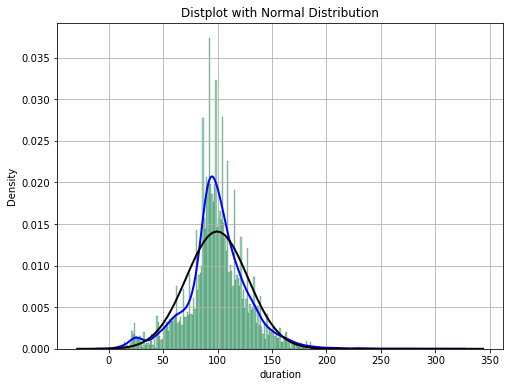

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming 'd2' is your DataFrame and it has a 'duration' column.
x1 = d2['duration'].fillna(0.0).astype(float)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the histogram
sns.histplot(x1, bins=int(180/0.7), kde=False, color="#6ad49b", stat="density")

# Plot the KDE (Kernel Density Estimate)
sns.kdeplot(x1, color="blue", linewidth=2)

# Overlay the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, x1.mean(), x1.std())
plt.plot(x, p, 'k', linewidth=2)

title = 'Distplot with Normal Distribution'
plt.title(title)
plt.grid()
plt.show()


#### What are the top Categories ?


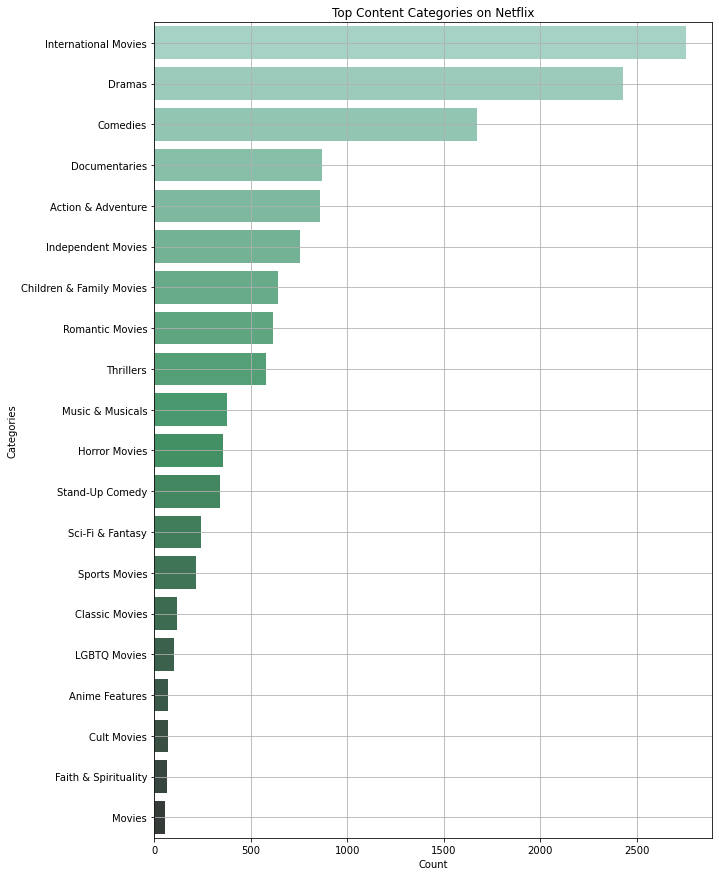

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate all the 'listed_in' strings and split them into a list of categories
categories = ", ".join(d2['listed_in']).split(", ")
# Count the occurrences of each category
counter_list = Counter(categories).most_common(50)
# Extract the category names and their counts
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]

# Create a horizontal bar plot
plt.figure(figsize=(10, 15))  # Adjust the figure size as needed
sns.barplot(x=values, y=labels, palette="BuGn_d")  

# Add the title and labels
plt.title("Top Content Categories on Netflix")
plt.xlabel("Count")
plt.ylabel("Categories")
plt.grid()
# Show the plot
plt.show()


##### Top Actors on Netflix with Most Movies

+ In the USA, Samuel L. Jackson appears approximately 20 times.
+ In South Korea, Sung Dong-il is the top actor.
+ Interestingly, he has many roles as a supporting actor rather than a lead.

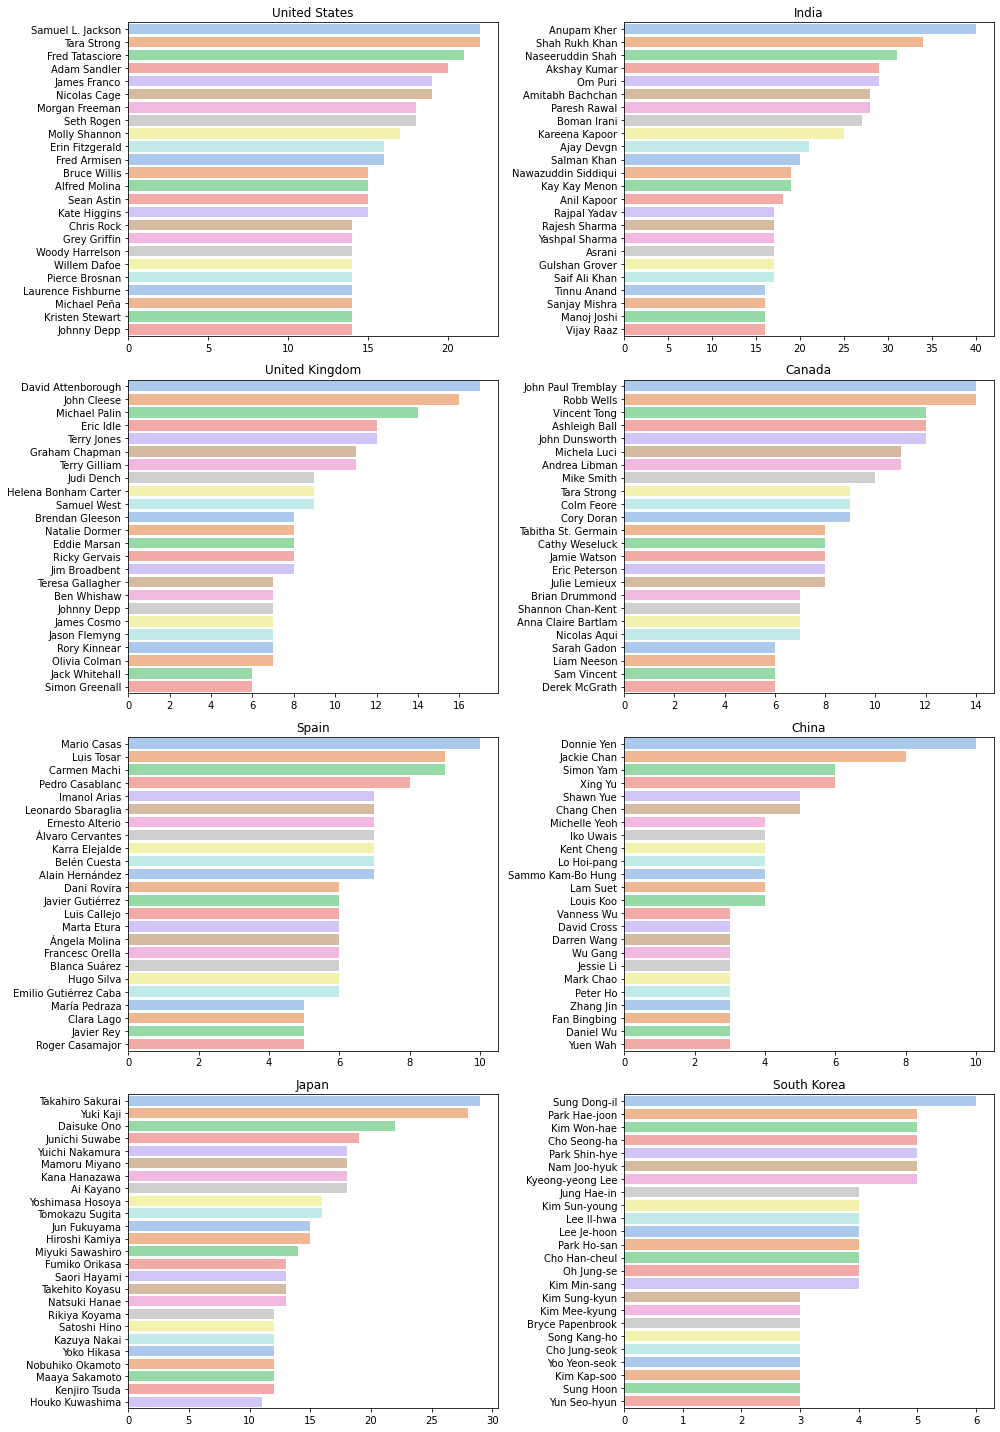

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

def plot_country_cast(data, country, flag="movie"):
    data["from_country"] = data['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small = data[data["from_country"] == 1]
    
    if flag == "movie":
        small = small[small["duration"].notna()]
    else:
        small = small[small["season_count"].notna()]
    
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if _[0].strip()]
    
    labels, values = zip(*tags)
    
    # Create the horizontal bar plot with a pastel palette
    sns.barplot(x=list(values), y=list(labels), palette="pastel")
    plt.title(country)

# Assuming 'data' is your DataFrame
countries = ["United States", "India", "United Kingdom", "Canada", "Spain","China", "Japan", "South Korea"]
flag = "movie"  # or "tv" for TV shows

# Set up the matplotlib figure, adjust the size and layout as needed
n_rows = (len(countries) + 1) // 2  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(14, 5 * n_rows))

for i, country in enumerate(countries):
    ax = plt.subplot(n_rows, 2, i+1)
    plot_country_cast(data, country, flag)
    plt.tight_layout()

plt.show()


In [15]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,season_count,from_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2,0


#### Simple Content-Based Filtering Using TF-IDF and Cosine Similarity
Content-based filtering is a type of recommendation system that suggests similar items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that describe the item. In the context of a Netflix dataset, the items are movies and TV shows, and the content includes attributes like titles, directors, cast, genres, and descriptions.

In [16]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import nltk
import re

In [23]:
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Function to preprocess text
def preprocess(text):
    text = re.sub('[^A-z]', ' ', text)
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)  
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    filtered_sentence = []  
    for w in word_tokens:  
        if w not in stop_words:  
            filtered_sentence.append(lemmatizer.lemmatize(w))
    filtered = ' '.join([x for x in filtered_sentence])
    return filtered.lower().strip()

# Prepare the data for content-based filtering
data = data.copy()
data['director'] = data['director'].fillna('')
data['cast'] = data['cast'].fillna('')
data['text'] = data['title'] + ' ' + data['director'] + ' ' + data['cast'] + ' ' + data['listed_in'] + ' ' + data['description']
data['text'] = data['text'].apply(lambda x: preprocess(x))

# Create TF-IDF features
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(data['text'])
similarity_matrix = cosine_similarity(text_features)

# Function to get recommendations
def get_recommendation(movie_name, data, similarity_matrix):
        try:
            movie_index = data[data['title'].str.contains(movie_name, case=False)].index[0]
            movie_similarity = similarity_matrix[movie_index]
            movie_data = pd.DataFrame({'cosine_similarity': movie_similarity, 'index': np.arange(len(data))})
            movie_data = movie_data.sort_values(by='cosine_similarity', ascending=False)
            topn = 10
            movie_ids = movie_data['index'][1:topn+1]
            recommendation_movies = list()
            for temp in movie_ids:
                movie = data['title'].iloc[temp]
                recommendation_movies.append(movie)
            return recommendation_movies
        except IndexError:
            return "Movie not found in the dataset."

# Getting recommendations for 'Transformers: Robots in Disguise'
get_recommendation('Transformers: Robots in Disguise', data, similarity_matrix)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Transformers Prime',
 'Hans Zimmer: Live in Prague',
 'Transformers: War For Cybertron Trilogy',
 'Transformers: Cyberverse',
 'Trese',
 'The Assassination of Gianni Versace',
 'Bureau of Magical Things',
 'Lego DC Comics: Batman Be-Leaguered',
 'Bobbleheads The Movie',
 'Yu-Gi-Oh!']